In [1]:
import numpy as np
import sqlite3 as db
import pandas as pd
from lsst.sims.utils import angularSeparation
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Define a point to look around
ra = 20
dec = -35

radius = 1.75
filter_colors = {'u': 'purple', 'g': 'blue', 'r': 'green', 'i': 'cyan', 'z': 'orange', 'y': 'red'}

In [3]:
filenames = ['baseline_1exp_pairsmix_10yrs.db', 'roll_mod3_sdf0.10mixed_10yrs.db', 'very_alt3_rm5illum15_10yrs.db']

baseline_1exp_pairsmix_10yrs.db 1110
roll_mod3_sdf0.10mixed_10yrs.db 1406
very_alt3_rm5illum15_10yrs.db 1034


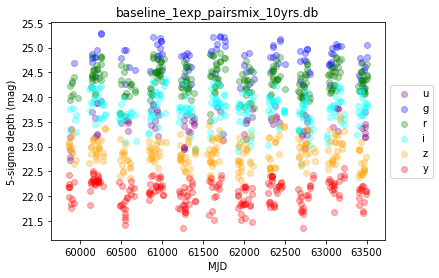

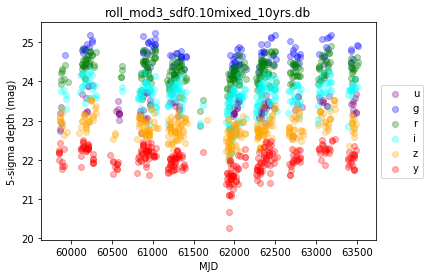

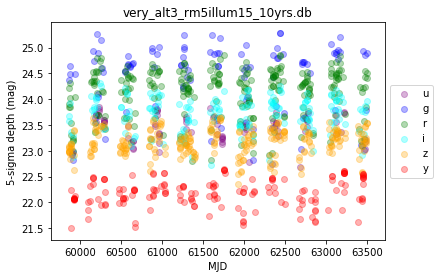

In [4]:
for filename in filenames:
    conn = db.connect(filename)
    df = pd.read_sql('select * from summaryallprops;', conn)
    
    ang_dist = angularSeparation(df['fieldRA'].values, df['fieldDec'].values, ra, dec)
    overlapping = np.where(ang_dist < radius)[0]
    df_sub = df.iloc[overlapping, :]
    fig, ax = plt.subplots()
    for filtername in filter_colors:
        infilt = np.where(df_sub['filter'].values == filtername)
        ax.scatter(df_sub['observationStartMJD'].values[infilt],
                   df_sub['fiveSigmaDepth'].values[infilt],
                   c=filter_colors[filtername], label=filtername, alpha=0.3)
    ax.set(xlabel='MJD', ylabel='5-sigma depth (mag)', title=filename)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    print(filename, df_sub.shape[0])


In [5]:
# What do we see in this plot. Looks like 11 seasons (the survey probably starts part way through the 
# first season, and last one is cut off)

In [6]:
df_sub

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,numExposures,airmass,...,rotTelPos,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase
11387,11387,20.503251,-36.570031,59866.272710,59866.292018,30.0,z,79.098142,1,1.108783,...,5.333896,22.389949,137.288971,3.473378,-0.140267,71.258605,25.634709,78.444843,135.371202,70.764211
11388,11388,19.561312,-33.700983,59866.273126,59866.292018,30.0,z,87.343623,1,1.116165,...,3.676230,22.245571,137.129657,3.473384,-0.140270,71.262001,25.636092,77.009158,138.258850,70.762632
11422,11422,20.503251,-36.570031,59866.288625,59866.292018,30.0,z,79.098142,1,1.157000,...,9.303503,16.779915,131.506594,3.473635,-0.140371,71.387462,25.685929,78.558188,135.365713,70.704497
11423,11423,19.561312,-33.700983,59866.289039,59866.292018,30.0,z,87.343623,1,1.168396,...,6.494362,16.631181,131.364570,3.473642,-0.140374,71.390787,25.687215,77.124919,138.253100,70.702962
11449,11449,20.503251,-36.570031,59866.300293,59866.325862,30.0,z,88.596814,1,1.200297,...,2.345904,12.527827,127.665980,3.473824,-0.140447,71.480571,25.721264,78.638819,135.361686,70.661621
11451,11451,19.561312,-33.700983,59866.301119,59866.325862,30.0,z,93.913156,1,1.217206,...,1.875981,12.221470,127.406316,3.473837,-0.140452,71.487121,25.723695,77.210224,138.248732,70.658614
11484,11484,20.503251,-36.570031,59866.315092,59866.325862,30.0,z,88.596814,1,1.266651,...,5.278020,6.928695,123.246503,3.474063,-0.140543,71.597050,25.763385,78.738110,135.356576,70.608321
11486,11486,19.561312,-33.700983,59866.315918,59866.325862,30.0,z,93.913156,1,1.289907,...,4.130874,6.612397,123.012752,3.474076,-0.140548,71.603514,25.765645,77.311741,138.243377,70.605373
13082,13082,20.036860,-35.190213,59868.254748,59868.275433,30.0,i,79.373306,1,1.080023,...,5.068144,46.119225,144.992470,3.505509,-0.153080,98.137324,28.115366,97.062323,136.032202,58.494126
13117,13117,20.036860,-35.190213,59868.270987,59868.275433,30.0,r,79.373306,1,1.122081,...,9.095903,42.301618,138.407601,3.505772,-0.153185,98.298272,28.143582,97.193441,136.025968,58.424755


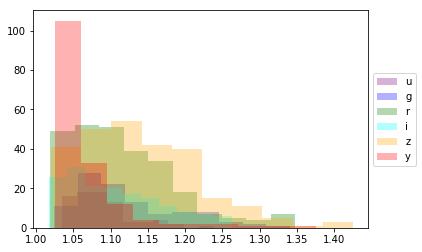

In [14]:
fig, ax = plt.subplots()
for filtername in filter_colors:
    infilt = np.where(df_sub['filter'].values == filtername)
    ack = ax.hist(df_sub['airmass'].values[infilt], color=filter_colors[filtername], alpha=.3, label=filtername) 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))